In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, f1_score, accuracy_score, make_scorer, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow import keras


Cargo el Dataset modificado anteriormente para usarlo en los modelos

In [28]:
url = 'D:\App Exes\VS Code\Proyecto Final Data\Dataframe.csv'
df = pd.read_csv(url, sep = ',')
df.head()

id  gender  age  hypertension  heart_disease  ever_married  \
0   9046       1   67             0              1             1   
1  51676       0   61             0              0             1   
2  31112       1   80             0              1             1   
3  60182       0   49             0              0             1   
4   1665       0   79             1              0             1   

   Residence_type  avg_glucose_level  bmi  stroke  work_type_Govt_job  \
0               1                228   36       1                   0   
1               0                202   30       1                   0   
2               0                105   32       1                   0   
3               1                171   34       1                   0   
4               0                174   24       1                   0   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  smoking_status_Unknown  smoking_status_formerly smoked  \
0                   0                       0                               1   
1                   0                       0                               0   
2                   0                       0                               0   
3                   0                       0                               0   
4                   0                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  posibilidad_stroke  
0                            0                      0                   1  
1                            1                      0                   1  
2                            1                      0                   1  
3                            0                      1                   1  
4                            1                      0                   1

Teniendo en cuenta todos los Insight realizados e investigaciones sobre los ACV voy a generar etiquetas relacionando variables del DF

Primero una etiqueta que relacione la Edad, Glucosa en Sangre, BMI y el tipo de Trabajo.
Esto porque el estres de distintas situaciones de trabajo genera distintos niveles de BMI y glucosa en sangre.
La edad se usa como linea de tiempo mientras mas grande mas tiempo de trabajo.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


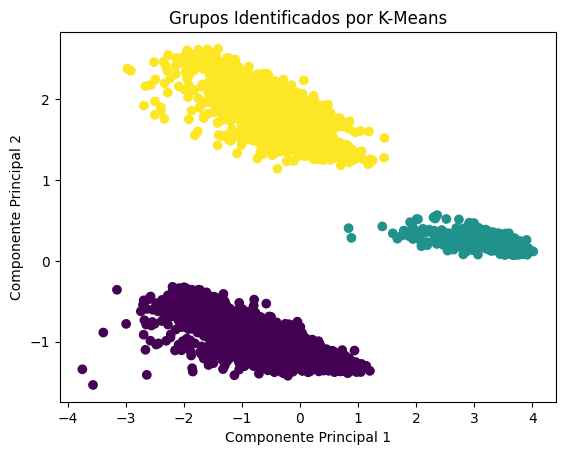

In [29]:
# Seleccionar las características para el análisis de clustering
X = df[['age', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['work_salud'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


Segundo una relacion entre la Edad, Glucosa en Sangre, BMI y el tipo de Fumador.
Esto porque el tipo de fumador genera distintos niveles de BMI y glucosa en sangre.
La edad se usa como linea de tiempo mientras mas grande mas se ven los efectos del tabaquismo.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


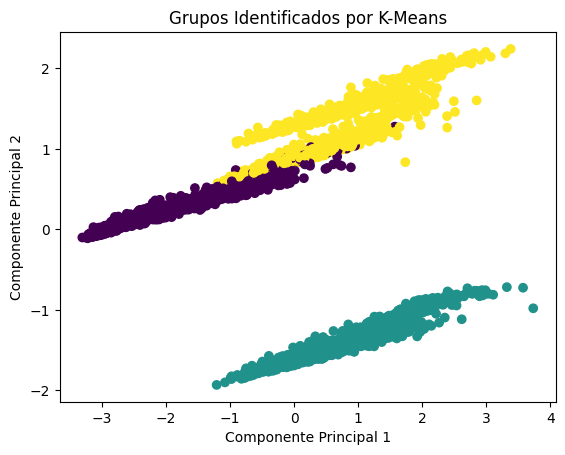

In [30]:
#Seleccionar las características para el análisis de clustering
X = df[['age', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=78)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['smoking_salud'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


Los ultimos 2 clusters los separo entre BMI y Glucosa en Sangre ya que asi se consigue una mejor distribucion de las variables, sino se genera un clsuter sin forma.

El tercero la relacion entre Hipertension, DCV y BMI.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


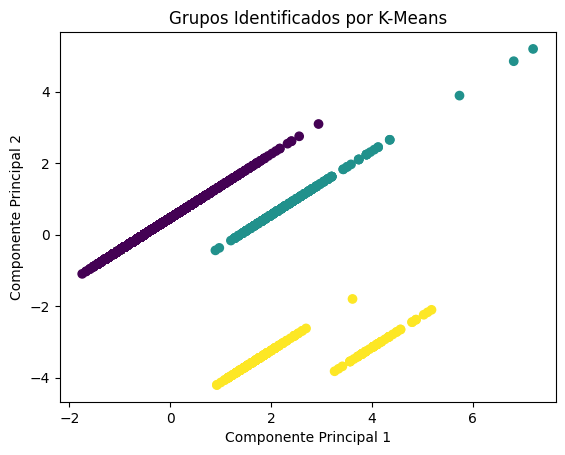

In [31]:
#Seleccionar las características para el análisis de clustering
X = df[['hypertension', 'heart_disease', 'bmi']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['bmi_hdcv'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


El cuarto la relacion entre Hipertension, DCV y Glucosa en sangre.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


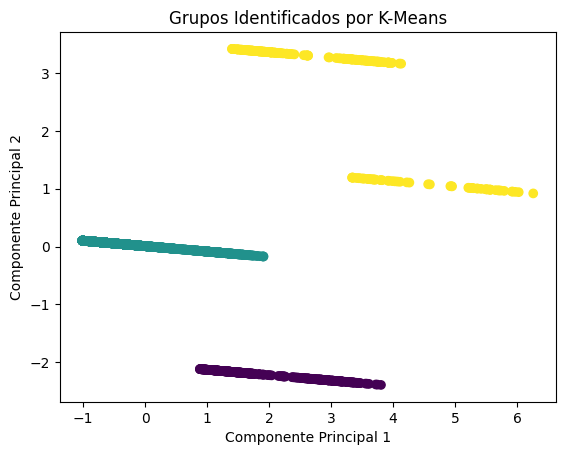

In [32]:
#Seleccionar las características para el análisis de clustering
X = df[['hypertension', 'heart_disease', 'avg_glucose_level']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['avg_hdcv'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


In [33]:
df.head()

id  gender  age  hypertension  heart_disease  ever_married  \
0   9046       1   67             0              1             1   
1  51676       0   61             0              0             1   
2  31112       1   80             0              1             1   
3  60182       0   49             0              0             1   
4   1665       0   79             1              0             1   

   Residence_type  avg_glucose_level  bmi  stroke  ...  work_type_children  \
0               1                228   36       1  ...                   0   
1               0                202   30       1  ...                   0   
2               0                105   32       1  ...                   0   
3               1                171   34       1  ...                   0   
4               0                174   24       1  ...                   0   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                       0                               1   
1                       0                               0   
2                       0                               0   
3                       0                               0   
4                       0                               0   

   smoking_status_never smoked  smoking_status_smokes  posibilidad_stroke  \
0                            0                      0                   1   
1                            1                      0                   1   
2                            1                      0                   1   
3                            0                      1                   1   
4                            1                      0                   1   

   work_salud  smoking_salud  bmi_hdcv  avg_hdcv  
0           0              2         2         2  
1           2              1         0         1  
2           0              1         2         2  
3           0              2         0         1  
4           2              1         1         0  

[5 rows x 24 columns]

Genero mapa de correlatividad entre variables.

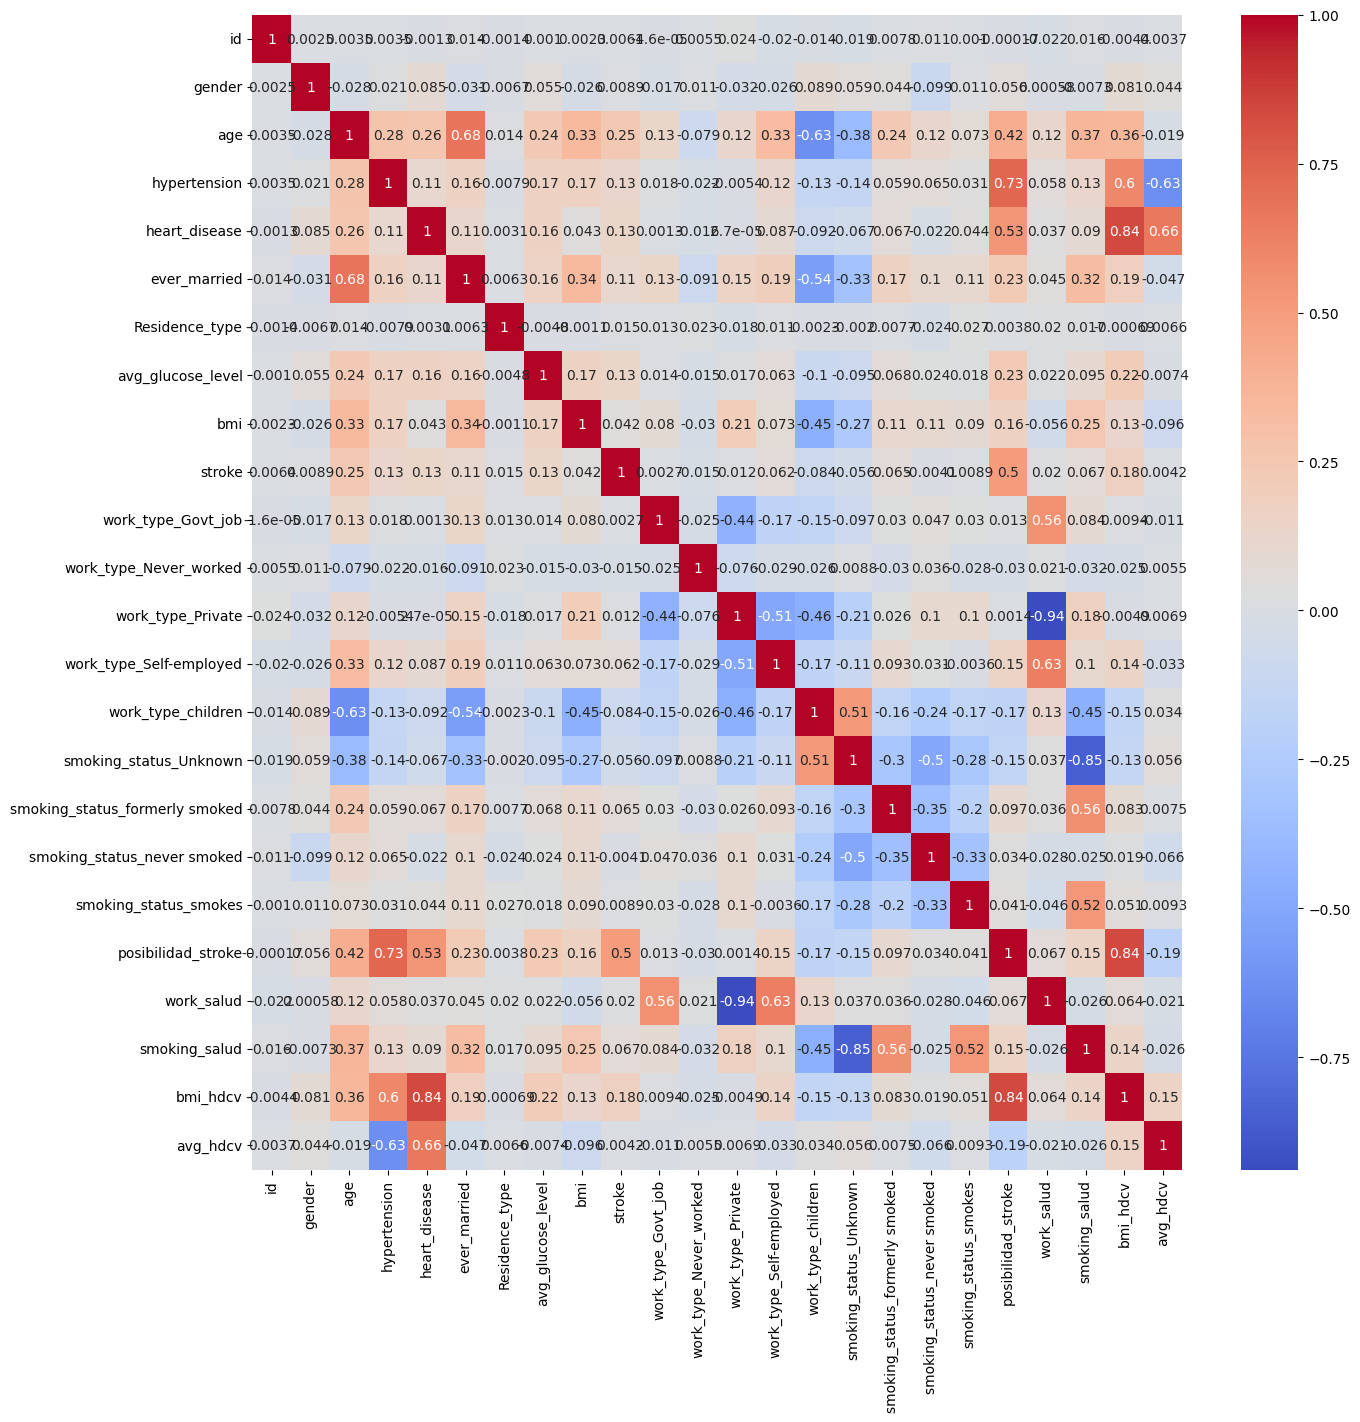

In [34]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Empiezo con la creacion y entrenamiento de distintos modelos para la prediccion de la variable Stroke.
Teniendo en cuenta que mi objetivo es predecir una variable voy a usar modelos de entrenamiento supervisado
Regresion Logistica, KNN y Arbol de Desicion.

El primero un modelo de Regresion Logistica

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

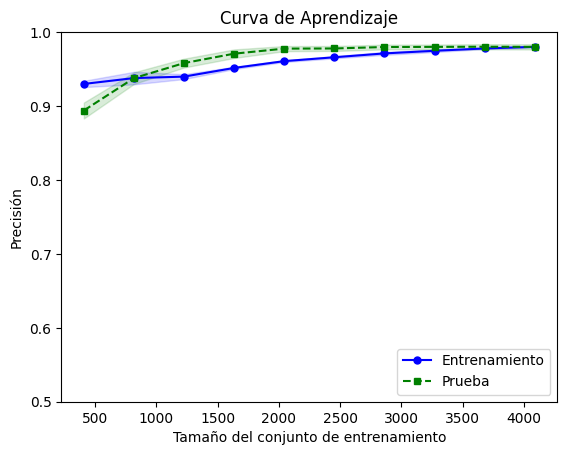

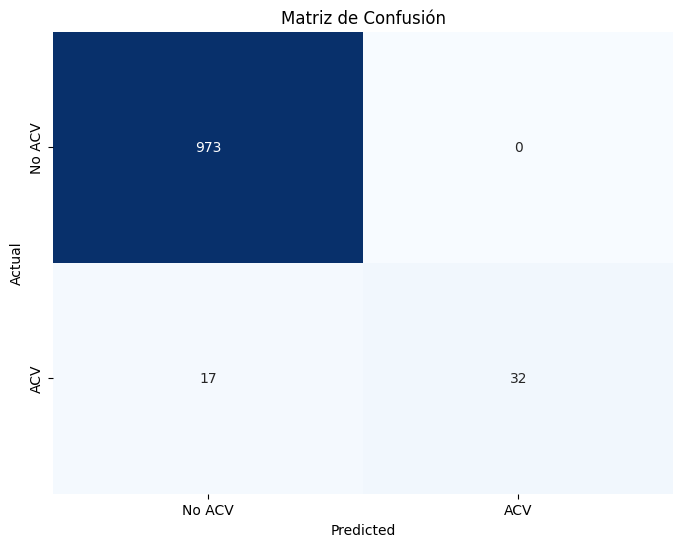

Precisión: 0.98
Precision: 1.00
Recall: 0.65
F1-score: 0.79
AUC-ROC: 0.83


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Seleccionar las características y la variable objetivo para df
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Dividir df en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Crear el modelo de regresión logística
reg = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
reg.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de entrenamiento y prueba
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

# Calcular la precisión para los datos de entrenamiento y prueba
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

# Obtener las predicciones del modelo para los datos de prueba
y_pred = reg.predict(X_test)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.xticks([0.5, 1.5], ['No ACV', 'ACV'])
plt.yticks([0.5, 1.5], ['No ACV', 'ACV'])
plt.show()

# Calcular el F1-score para los datos de entrenamiento y prueba
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f'Precisión: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

El segundo un modelo KNN

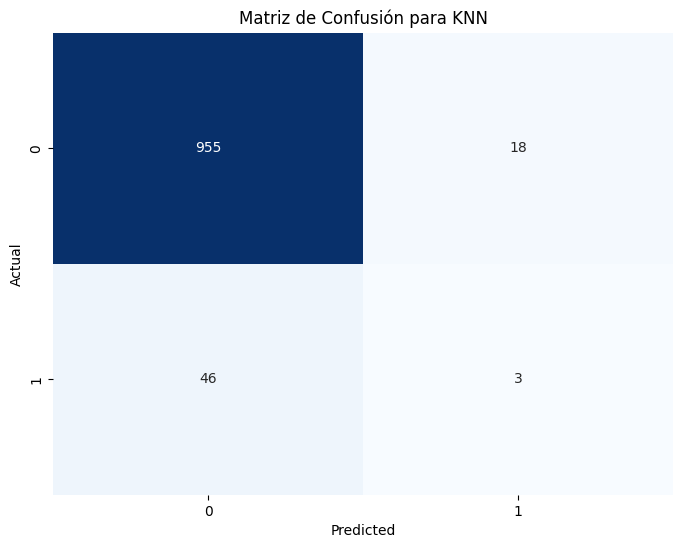

Precisión de KNN en datos de prueba: 0.9373776908023483


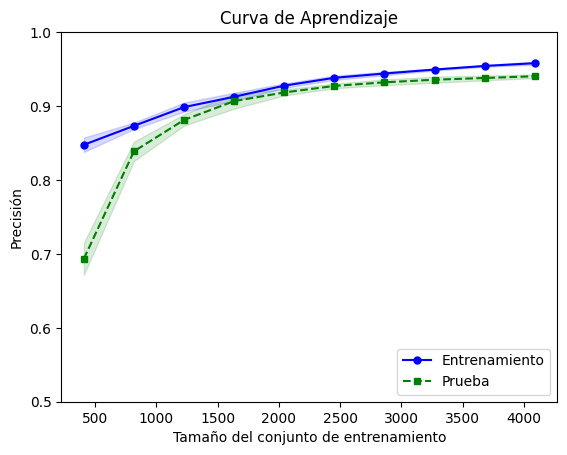

In [36]:
# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de prueba
knn_test_pred = knn_model.predict(X_test)

# Calcular la precisión para los datos de prueba
knn_test_acc = accuracy_score(y_test, knn_test_pred)
# Crear la matriz de confusión para KNN
cm_knn = confusion_matrix(y_test, knn_test_pred)

# Crear el heatmap de la matriz de confusión para KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión para KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Precisión de KNN en datos de prueba:", knn_test_acc)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(knn_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()


El tercero un modelo de un Arbol de Clasificacion

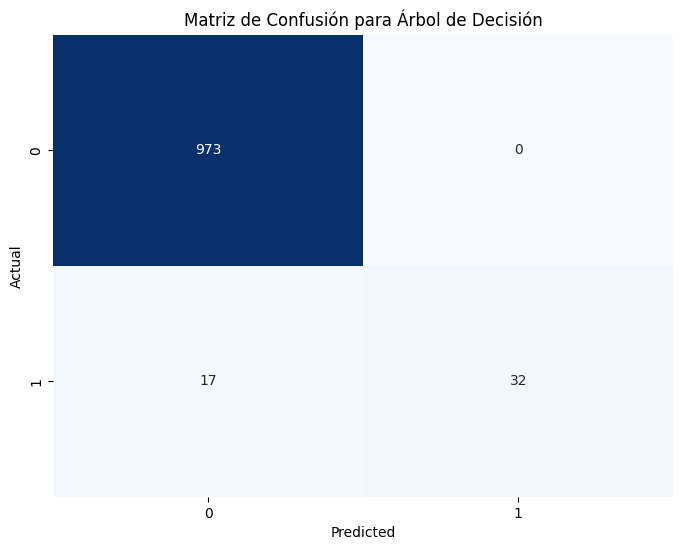

Precisión del Árbol de Decisión en datos de prueba: 0.9833659491193738


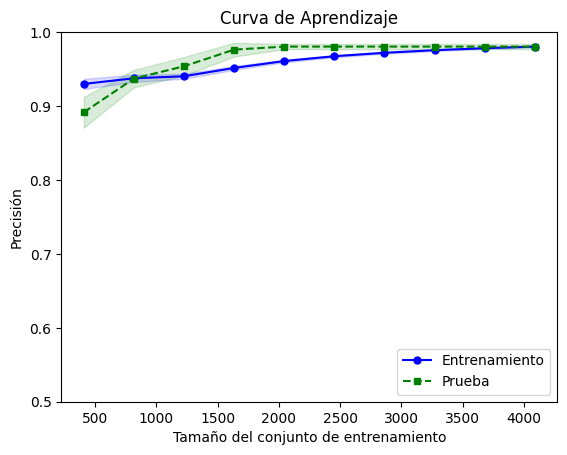

In [37]:
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de prueba
tree_test_pred = tree_model.predict(X_test)

# Calcular la precisión para los datos de prueba
tree_test_acc = accuracy_score(y_test, tree_test_pred)

# Crear la matriz de confusión para Árbol de Decisión
cm_tree = confusion_matrix(y_test, tree_test_pred)

# Crear el heatmap de la matriz de confusión para Árbol de Decisión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Precisión del Árbol de Decisión en datos de prueba:", tree_test_acc)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(tree_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

El cuarto una Red Neuronal

In [38]:
# Seleccionar las características y la variable objetivo para df
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para que tengan media 0 y desviación estándar 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calcular un peso para cada muestra en función de las características
def calcular_pesos(X):
    # Inicialmente, todos los pesos son 1
    pesos = np.ones(X.shape[0])

    # Asignar pesos más altos a las muestras con edades altas
    pesos[(X[:, 1] >= 58) & (X[:, 1] <= 78)] = 2.0
    
    # Asignar pesos más altos a las muestras con valores de avg_glucose_level y bmi más altos
    pesos[(X[:, 2] >= 120)] = 2.0
    pesos[(X[:, 3] >= 25)] = 3.0

    # Asignar pesos más altos a las muestras con valores de posibilidad_stroke igual a 1
    pesos[(X[:, 4] == 1)] = 5.0

    # Asignar pesos más altos a las muestras con valores de smoking_salud igual a 1
    pesos[(X[:, 6] >= 0)] = 2.0
    
    return pesos

# Calcular los pesos de las muestras de entrenamiento
pesos_entrenamiento = calcular_pesos(X_train_scaled)

# Crear el modelo secuencial
red_model = Sequential()

# Agregar capas a la red neuronal
red_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
red_model.add(Dense(32, activation='relu'))
red_model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo y proporcionar los pesos de las muestras
red_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo con los pesos de las muestras
history = red_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2, sample_weight=pesos_entrenamiento)

Epoch 1/50
103/103 - 1s - loss: 0.2699 - accuracy: 0.9541 - val_loss: 0.1356 - val_accuracy: 0.9548 - 785ms/epoch - 8ms/step
Epoch 2/50
103/103 - 0s - loss: 0.1273 - accuracy: 0.9627 - val_loss: 0.0920 - val_accuracy: 0.9841 - 102ms/epoch - 987us/step
Epoch 3/50
103/103 - 0s - loss: 0.1005 - accuracy: 0.9798 - val_loss: 0.0783 - val_accuracy: 0.9878 - 120ms/epoch - 1ms/step
Epoch 4/50
103/103 - 0s - loss: 0.0894 - accuracy: 0.9804 - val_loss: 0.0648 - val_accuracy: 0.9878 - 118ms/epoch - 1ms/step
Epoch 5/50
103/103 - 0s - loss: 0.0865 - accuracy: 0.9804 - val_loss: 0.0611 - val_accuracy: 0.9878 - 111ms/epoch - 1ms/step
Epoch 6/50
103/103 - 0s - loss: 0.0820 - accuracy: 0.9817 - val_loss: 0.0598 - val_accuracy: 0.9878 - 100ms/epoch - 971us/step
Epoch 7/50
103/103 - 0s - loss: 0.0826 - accuracy: 0.9807 - val_loss: 0.0609 - val_accuracy: 0.9878 - 109ms/epoch - 1ms/step
Epoch 8/50
103/103 - 0s - loss: 0.0771 - accuracy: 0.9813 - val_loss: 0.0642 - val_accuracy: 0.9866 - 104ms/epoch - 1ms/s

32/32 [==============================] - 0s 613us/step - loss: 0.0845 - accuracy: 0.9687
Pérdida en datos de prueba: 0.08
Precisión en datos de prueba: 96.87%
32/32 [==============================] - 0s 516us/step


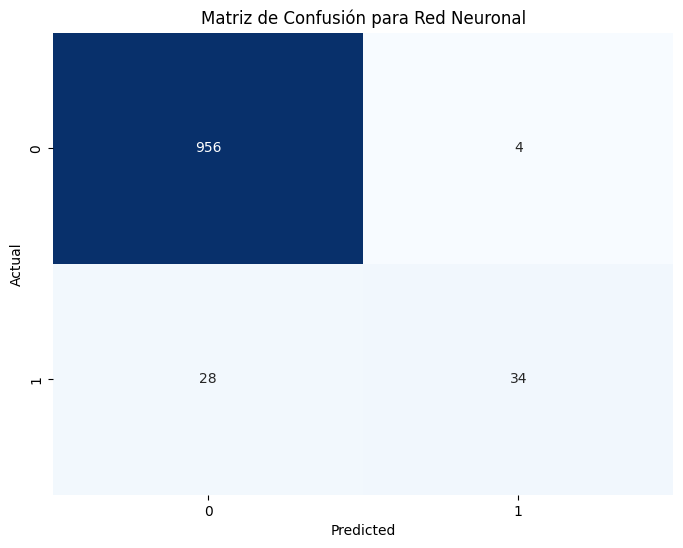

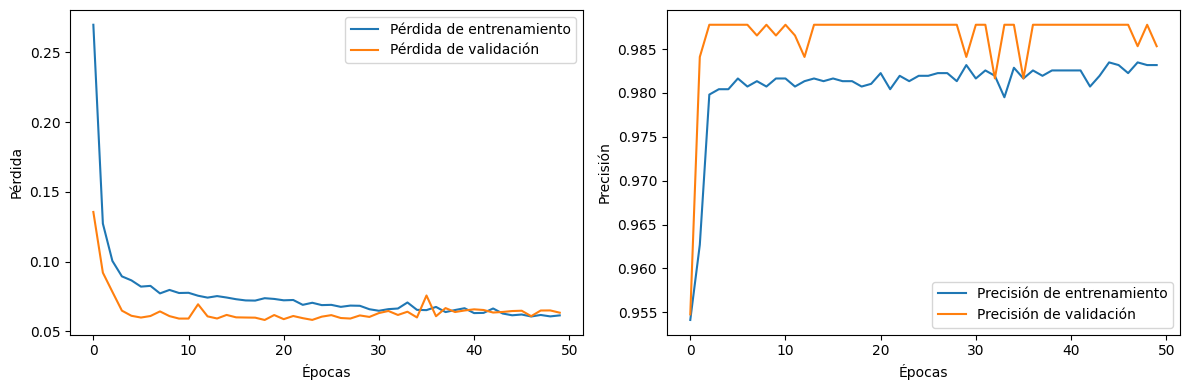

In [39]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = red_model.evaluate(X_test_scaled, y_test)
print(f"Pérdida en datos de prueba: {loss:.2f}")
print(f"Precisión en datos de prueba: {accuracy * 100:.2f}%")

# Calcular la matriz de confusión
y_pred = red_model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión para Red Neuronal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Crear un gráfico de aprendizaje
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Pérdida de entrenamiento')
plt.plot(val_loss, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Precisión de entrenamiento')
plt.plot(val_accuracy, label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

Creo 4 modelos de Regresion Logistica para predecir el valor de cada cluster, Esto con el fin de que cuando ingrese valores para probar los modelos estos modelos ingresen el valor correspondientes.

In [40]:
# Datos de entrada
X = df[['age', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']]
y_cluster = df['work_salud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster, y_test_cluster = train_test_split(X, y_cluster, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster = LogisticRegression()
model_cluster.fit(X_train, y_train_cluster)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster = model_cluster.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)

print("Precisión del modelo para work_salud:", accuracy_cluster)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Datos de entrada
X = df[['age', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']]
y_cluster2 = df['smoking_salud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster2, y_test_cluster2 = train_test_split(X, y_cluster2, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster2 = LogisticRegression()
model_cluster2.fit(X_train, y_train_cluster2)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster2 = model_cluster2.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster2 = accuracy_score(y_test_cluster2, y_pred_cluster2)

print("Precisión del modelo para smoking_salud:", accuracy_cluster2)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Datos de entrada
X = df[['hypertension', 'heart_disease', 'bmi']]
y_cluster3 = df['bmi_hdcv']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster3, y_test_cluster3 = train_test_split(X, y_cluster3, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster3 = LogisticRegression()
model_cluster3.fit(X_train, y_train_cluster3)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster3 = model_cluster3.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster3 = accuracy_score(y_test_cluster3, y_pred_cluster3)

print("Precisión del modelo para bmi_hdcv:", accuracy_cluster3)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Datos de entrada
X = df[['hypertension', 'heart_disease', 'avg_glucose_level']]
y_cluster4 = df['avg_hdcv']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster4, y_test_cluster4 = train_test_split(X, y_cluster4, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster4 = LogisticRegression()
model_cluster4.fit(X_train, y_train_cluster4)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster4 = model_cluster4.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster4 = accuracy_score(y_test_cluster4, y_pred_cluster4)

print("Precisión del modelo para avg_hdcv:", accuracy_cluster4)

Precisión del modelo para work_salud: 1.0
Precisión del modelo para smoking_salud: 1.0
Precisión del modelo para bmi_hdcv: 1.0
Precisión del modelo para avg_hdcv: 1.0


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Hago cross validation a los 3 primeros modelos (Regresion, KNN y Arbol)

In [41]:
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Definir los modelos
models = [reg, knn_model, tree_model]

# Definir una función para calcular el F1-score en lugar de accuracy
f1_scorer = make_scorer(f1_score)

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring=f1_scorer)
    print(f"F1-score promedio para {model.__class__.__name__}: {scores.mean():.2f} (+/- {scores.std():.2f})")

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

F1-score promedio para LogisticRegression: 0.74 (+/- 0.05)
F1-score promedio para KNeighborsClassifier: 0.10 (+/- 0.03)
F1-score promedio para DecisionTreeClassifier: 0.75 (+/- 0.05)


Le hago cross validation a la Red Neuronal

In [42]:
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Definir el número de divisiones para la validación cruzada (por ejemplo, 5 divisiones)
n_splits = 5
kf = KFold(n_splits=n_splits)

# Convertir X e y a matrices numpy
X = X.to_numpy()
y = y.to_numpy()

# Listas para almacenar las puntuaciones de precisión en cada división
accuracy_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

red_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluar el modelo en el conjunto de prueba
_, accuracy = red_model.evaluate(X_test, y_test)
accuracy_scores.append(accuracy)

# Calcular el promedio y la desviación estándar de las puntuaciones de precisión
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print(f'Precisión promedio: {mean_accuracy:.2f}')
print(f'Desviación estándar de la precisión: {std_accuracy:.2f}')

32/32 [==============================] - 0s 648us/step - loss: 8.0302 - accuracy: 0.9393
Precisión promedio: 0.94
Desviación estándar de la precisión: 0.00


De los 4 modelos utilizados para predecir stroke el modelo que mejor precision tiene es la Red Neuronal con 94% le siguen el modelo de Regresion Logistica y el Arbol de Decision con 75% y ultimo el KNN con 10%

A continuacion uso los modelos con los mismos datos para todos.

In [43]:
# Ejemplo de nuevos datos para la predicción
# Valores importantes:      @   @   @  @         @   @   & [      @      ][     @    ]{Estas se modifican solas}
new_data = np.array([[0000, 1 , 60, 0, 1, 1, 0, 180, 26, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [44]:
# Índices de las columnas específicas que deseas utilizar
datos = [1, 2, 7, 8, 19, 20, 21, 22, 23]
selected_column_indices = [2, 7, 8, 10, 11, 12, 13, 14]
selected_column_indices2 = [2, 7, 8, 15, 16, 17, 18]
selected_column_indices3 = [3, 4, 8]
selected_column_indices4 = [3, 4, 7]
selected_column_indices5 = [3, 4, 9]

# Seleccionar las columnas específicas de new_data para la predicción
predict_data = new_data[:, datos]
selected_columns = new_data[:, selected_column_indices]
selected_columns2 = new_data[:, selected_column_indices2]
selected_columns3 = new_data[:, selected_column_indices3]
selected_columns4 = new_data[:, selected_column_indices4]
selected_columns5 = new_data[:, selected_column_indices5]


#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

if selected_columns5[:, -3] == 1 or selected_columns5[:, -2] == 1:
    predict_data[:, -5] = 1
else:
    predict_data[:, -5] = 0

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster = model_cluster.predict(selected_columns)

predict_data[:, -4] = predicted_cluster

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster2 utilizando el modelo de cluster2
predicted_cluster2 = model_cluster2.predict(selected_columns2)

# Agregar las predicciones de cluster2 a new_data
predict_data[:, -3] = predicted_cluster2

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster3 = model_cluster3.predict(selected_columns3)

predict_data[:, -2] = predicted_cluster3

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster4 = model_cluster4.predict(selected_columns4)

predict_data[:, -1] = predicted_cluster4

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Preparar los datos para la red neuronal
X = predict_data
X_scaled = scaler.transform(X)

# Realizar la predicción utilizando el modelo de red neuronal
predictions = red_model.predict(X_scaled)

# Calcular la probabilidad como un porcentaje del 0 al 100
probability_percentage = predictions[0][0] * 100

# Imprimir la probabilidad como un porcentaje
print("La probabilidad de tener un ACV es:", probability_percentage, "%")

1/1 [==============================] - 0s 44ms/step
La probabilidad de tener un ACV es: 15.923796594142914 %


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: 

El modelo de Red Neuronal hasta ahora es el modelo mas fiable ya que genera valores entre 0 y 100 y los % son realistas segun los valores ingresados

In [45]:
# Índices de las columnas específicas que deseas utilizar
datos = [1, 2, 7, 8, 19, 20, 21, 22, 23]
selected_column_indices = [2, 7, 8, 10, 11, 12, 13, 14]
selected_column_indices2 = [2, 7, 8, 15, 16, 17, 18]
selected_column_indices3 = [3, 4, 8]
selected_column_indices4 = [3, 4, 7]
selected_column_indices5 = [3, 4, 9]

# Seleccionar las columnas específicas de new_data para la predicción
predict_data = new_data[:, datos]
selected_columns = new_data[:, selected_column_indices]
selected_columns2 = new_data[:, selected_column_indices2]
selected_columns3 = new_data[:, selected_column_indices3]
selected_columns4 = new_data[:, selected_column_indices4]
selected_columns5 = new_data[:, selected_column_indices5]


#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

if selected_columns5[:, -3] == 1 or selected_columns5[:, -2] == 1:
    predict_data[:, -5] = 1
else:
    predict_data[:, -5] = 0

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster = model_cluster.predict(selected_columns)

predict_data[:, -4] = predicted_cluster

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster2 utilizando el modelo de cluster2
predicted_cluster2 = model_cluster2.predict(selected_columns2)

# Agregar las predicciones de cluster2 a new_data
predict_data[:, -3] = predicted_cluster2

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster3 = model_cluster3.predict(selected_columns3)

predict_data[:, -2] = predicted_cluster3

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster4 = model_cluster4.predict(selected_columns4)

predict_data[:, -1] = predicted_cluster4

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Preparar los datos para la red neuronal
X = predict_data
X_scaled = scaler.transform(X)

# Realizar la predicción utilizando el modelo de red neuronal
predictions = tree_model.predict(X_scaled)

# Realizar la predicción utilizando el modelo de árbol de decisión
predicted_probabilities = tree_model.predict_proba(X_scaled)

# La probabilidad de la clase positiva (ACV)
probability_positive_class = predicted_probabilities[0, 1] * 100

# Imprimir la probabilidad como un porcentaje
print("La probabilidad de tener un ACV es:", probability_positive_class, "%")

La probabilidad de tener un ACV es: 8.361204013377927 %


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: 

El Arbol de Decision genera porcentajes muy parecidos a la Red Neuronal

In [46]:
# Índices de las columnas específicas que deseas utilizar
datos = [1, 2, 7, 8, 19, 20, 21, 22, 23]
selected_column_indices = [2, 7, 8, 10, 11, 12, 13, 14]
selected_column_indices2 = [2, 7, 8, 15, 16, 17, 18]
selected_column_indices3 = [3, 4, 8]
selected_column_indices4 = [3, 4, 7]
selected_column_indices5 = [3, 4, 9]

# Seleccionar las columnas específicas de new_data para la predicción
predict_data = new_data[:, datos]
selected_columns = new_data[:, selected_column_indices]
selected_columns2 = new_data[:, selected_column_indices2]
selected_columns3 = new_data[:, selected_column_indices3]
selected_columns4 = new_data[:, selected_column_indices4]
selected_columns5 = new_data[:, selected_column_indices5]


#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

if selected_columns5[:, -3] == 1 or selected_columns5[:, -2] == 1:
    predict_data[:, -5] = 1
else:
    predict_data[:, -5] = 0

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster = model_cluster.predict(selected_columns)

predict_data[:, -4] = predicted_cluster

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster2 utilizando el modelo de cluster2
predicted_cluster2 = model_cluster2.predict(selected_columns2)

# Agregar las predicciones de cluster2 a new_data
predict_data[:, -3] = predicted_cluster2

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster3 = model_cluster3.predict(selected_columns3)

predict_data[:, -2] = predicted_cluster3

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster4 = model_cluster4.predict(selected_columns4)

predict_data[:, -1] = predicted_cluster4

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Preparar los datos para la red neuronal
X = predict_data
X_scaled = scaler.transform(X)

# Realizar la predicción utilizando el modelo de red neuronal
predictions = tree_model.predict(X_scaled)

# Realizar la predicción utilizando el modelo de árbol de decisión
predicted_probabilities = reg.predict_proba(X_scaled)

# La probabilidad de la clase positiva (ACV)
probability_positive_class = predicted_probabilities[0, 1] * 100

# Imprimir la probabilidad como un porcentaje
print("La probabilidad de tener un ACV es:", probability_positive_class, "%")

La probabilidad de tener un ACV es: 99.61797307351226 %


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: 

El modelo de Regresion Logistica genera valores extremistas o muy bajos o muy altos

In [47]:
# Índices de las columnas específicas que deseas utilizar
datos = [1, 2, 7, 8, 19, 20, 21, 22, 23]
selected_column_indices = [2, 7, 8, 10, 11, 12, 13, 14]
selected_column_indices2 = [2, 7, 8, 15, 16, 17, 18]
selected_column_indices3 = [3, 4, 8]
selected_column_indices4 = [3, 4, 7]
selected_column_indices5 = [3, 4, 9]

# Seleccionar las columnas específicas de new_data para la predicción
predict_data = new_data[:, datos]
selected_columns = new_data[:, selected_column_indices]
selected_columns2 = new_data[:, selected_column_indices2]
selected_columns3 = new_data[:, selected_column_indices3]
selected_columns4 = new_data[:, selected_column_indices4]
selected_columns5 = new_data[:, selected_column_indices5]


#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

if selected_columns5[:, -3] == 1 or selected_columns5[:, -2] == 1:
    predict_data[:, -5] = 1
else:
    predict_data[:, -5] = 0

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster = model_cluster.predict(selected_columns)

predict_data[:, -4] = predicted_cluster

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster2 utilizando el modelo de cluster2
predicted_cluster2 = model_cluster2.predict(selected_columns2)

# Agregar las predicciones de cluster2 a new_data
predict_data[:, -3] = predicted_cluster2

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster3 = model_cluster3.predict(selected_columns3)

predict_data[:, -2] = predicted_cluster3

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Realizar predicciones de cluster utilizando el modelo de cluster
predicted_cluster4 = model_cluster4.predict(selected_columns4)

predict_data[:, -1] = predicted_cluster4

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Preparar los datos para la red neuronal
X = predict_data
X_scaled = scaler.transform(X)

# Realizar la predicción utilizando el modelo de red neuronal
predictions = tree_model.predict(X_scaled)

# Realizar la predicción utilizando el modelo de árbol de decisión
predicted_probabilities = knn_model.predict_proba(X_scaled)

# La probabilidad de la clase positiva (ACV)
probability_positive_class = predicted_probabilities[0, 1] * 100

# Imprimir la probabilidad como un porcentaje
print("La probabilidad de tener un ACV es:", probability_positive_class, "%")

La probabilidad de tener un ACV es: 0.0 %


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: 

In [48]:
predict_data

array([[  1,  60, 180,  26,   1,   2,   2,   2,   2]])

El modelo KNN predice valores muy bajos, sin importar los valores

En conclusion predecir los ACV es muy dificil no solo por las tipo de variables sino que tambien por la falta de pacientes con ACV en el dataset, mas alla de los porcentajes que generan lso modelos despues de ser entrenados, estos valores son muy dificiles de validar ya que los ACV son muy poco comunes y se desconoce la razon principal de estos mismos.

In [60]:
import pandas as pd

# Crear un DataFrame para almacenar las predicciones
df_predicciones = pd.DataFrame(columns=['id', 'stroke', 'pred_reg', 'pred_knn', 'pred_tree', 'pred_red'])

# Iterar a través de todos los pacientes en el DataFrame df
for index, paciente in df.head(5).iterrows():
    # Obtener el ID del paciente y si tuvo un ACV (stroke)
    id_paciente = paciente['id']
    stroke = paciente['stroke']
    
    # Obtener los datos del paciente para la predicción
    datos_paciente = paciente[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']].values.reshape(1, -1)
    
    # Hacer predicciones con los modelos
    pred_reg = reg.predict(datos_paciente)[0]
    pred_knn = knn_model.predict(datos_paciente)[0]
    pred_tree = tree_model.predict(datos_paciente)[0]
    pred_red = red_model.predict(datos_paciente)[0]
    
    # Agregar las predicciones al DataFrame de predicciones
    df_predicciones.loc[index] = [id_paciente, stroke, pred_reg, pred_knn, pred_tree, pred_red]

# El DataFrame df_predicciones contendrá las predicciones para cada paciente
print(df_predicciones)


1/1 [==============================] - 0s 19ms/step


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py

1/1 [==============================] - 0s 19ms/step
      id  stroke  pred_reg  pred_knn  pred_tree        pred_red
0   9046       1         0         0          0           [0.0]
1  51676       1         1         0          1           [0.0]
2  31112       1         0         1          0  [1.785939e-38]
3  60182       1         1         0          1           [0.0]
4   1665       1         0         0          0           [0.0]


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
